In [534]:
#import time
#from datetime import timedelta
#t_start = time.time()
import pandas as pd
#pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [535]:
##data = {'ID_EPARGNANT':[1,2,3,4,5,6,7,3],'ID_ENTREPRISE':[10,20,50,40,50,10,10,20],'DATE_AVOIRS':['2021-11-30','2021-11-30','2021-11-30','2021-11-30','2021-11-29','2021-11-29','2021-11-29','2021-11-29'],'PRODUIT':['PEE', 'PEE', 'PER', 'PEE', 'PER','PEE','PER','PER'], 'CODE_AMF':[4,1,7,7,3,3,1,3],'NIVEAU_RISQUE_FOND':[0,1,7,7,0,1,0,7],'AVOIRS_DISPONIBLE':[0.0000000,0.0000000,0.0000000,180.0000000,280.0000000,180.0000000,180.0000000,400.0000000],'AVOIRS_BLOQUE':[8000.0000,21.0000,22.0000,46.0000,15.0000,15.0000,15.0000,700.0000]}

In [536]:
##df_avo = pd.DataFrame(data)

In [537]:
df_avo = pd.read_parquet("C:/Users/nassimme/Desktop/Use_case_entreprise_et_fonds/01_data/split/N05MC_FAIT_AVO.20211130.parquet" ) 

In [538]:
df_avo.head(7) 

,ID_EPARGNANT,ID_ENTREPRISE,DATE_AVOIRS,PRODUIT,CODE_AMF,NIVEAU_RISQUE_FOND,AVOIRS_DISPONIBLE,AVOIRS_BLOQUE
0,36659689,40966,2021-11-30,PEE,4,0,0.000000,8106.985541
1,48902776,54627,2021-11-30,PEE,1,1,0.000000,21.057565
2,72183204,54627,2021-11-30,PEE,7,7,0.000000,221.482426
3,48902906,54627,2021-11-30,PEE,7,7,1799.376611,4680.310201
4,34896535,94007,2021-11-30,PEE,3,0,2987.454463,1545.428425
5,40495537,9213,2021-11-30,PEE,4,0,0.000000,2269.168335
6,59139841,50827,2021-11-30,PER,6,2,0.000000,5298.396463


In [539]:
## Ici on va prendre une copie du dataframe avec quelques colonnes  
df_avo_agg_risk = df_avo[['ID_ENTREPRISE','PRODUIT','NIVEAU_RISQUE_FOND','AVOIRS_DISPONIBLE','AVOIRS_BLOQUE']]
df_avo_agg_amf = df_avo[['ID_ENTREPRISE','PRODUIT','CODE_AMF','AVOIRS_DISPONIBLE','AVOIRS_BLOQUE']]

In [540]:
df_avo_agg_risk

,ID_ENTREPRISE,PRODUIT,NIVEAU_RISQUE_FOND,AVOIRS_DISPONIBLE,AVOIRS_BLOQUE
0,40966,PEE,0,0.000000,8106.985541
1,54627,PEE,1,0.000000,21.057565
2,54627,PEE,7,0.000000,221.482426
3,54627,PEE,7,1799.376611,4680.310201
4,94007,PEE,0,2987.454463,1545.428425
...,...,...,...,...,...
6704699,15815,PEE,2,0.000000,939.171176
6704700,16386,PEE,2,1029.954975,1386.405424
6704701,15815,PEE,1,0.000000,262.600311
6704702,120860,PEE,1,0.000000,3118.507168


In [541]:
df_avo_agg_amf

,ID_ENTREPRISE,PRODUIT,CODE_AMF,AVOIRS_DISPONIBLE,AVOIRS_BLOQUE
0,40966,PEE,4,0.000000,8106.985541
1,54627,PEE,1,0.000000,21.057565
2,54627,PEE,7,0.000000,221.482426
3,54627,PEE,7,1799.376611,4680.310201
4,94007,PEE,3,2987.454463,1545.428425
...,...,...,...,...,...
6704699,15815,PEE,6,0.000000,939.171176
6704700,16386,PEE,6,1029.954975,1386.405424
6704701,15815,PEE,1,0.000000,262.600311
6704702,120860,PEE,1,0.000000,3118.507168


In [542]:
#exp = pd.pivot_table(df_avo_agg_amf, values=['AVOIRS_TOTAL'], index=['ID_ENTREPRISE'], columns=['PRODUIT','CODE_AMF']).reset_index()

In [543]:
## ici on va faire une aggrégation par niveau_risque_fond pour le premier dataframe sur les deux colonnes indiqués c'est a dire faire la somme des lignes qui ont la meme valeur dans les colonnes indiqués

In [544]:
def transpose_df(df, values, index, columns):
    """
    Transpose df : columns unique value will be exploded in columns
    :param values: columns to sum
    :param index: columns to group by
    :param columns: columns to transpose
    """
    print('>>>> TRANSPOSE COLUMNS')
    df = pd.pivot_table(df, values=values, index=index, columns=columns).reset_index()
    print('>>>> RENAME COLUMNS')
    df.columns = ['_'.join(tuple(map(str, t))).rstrip('_') for t in df.columns.values]
    print('>>>> REPLACING null by 0')
    df.fillna(0, inplace=True)
    return df

### La partie code risque

In [545]:
df_avo_agg_risk['ENCOURS_TOTAL'] = df_avo_agg_risk['AVOIRS_DISPONIBLE']+df_avo_agg_risk['AVOIRS_BLOQUE']

In [546]:
df_avo_groupBy_risk=df_avo_agg_risk.groupby(['ID_ENTREPRISE','PRODUIT','NIVEAU_RISQUE_FOND']).agg({'ENCOURS_TOTAL':'sum'})

In [547]:
df_avo_groupBy_risk.head(10)

ENCOURS_TOTAL
ID_ENTREPRISE PRODUIT NIVEAU_RISQUE_FOND               
3             PEE     2                       39.265613
12            PEE     0                   939472.077207
                      1                   348564.057835
                      2                   132440.139555
              PER     0                   774092.511702
                      1                   274726.594866
                      2                   241231.530942
13            PEE     0                   380521.519140
                      1                   144454.107250
                      2                   147142.304635

In [548]:
df_avo_risk = transpose_df(df_avo_groupBy_risk, ['ENCOURS_TOTAL'], ['ID_ENTREPRISE'], ['PRODUIT', 'NIVEAU_RISQUE_FOND'])

>>>> TRANSPOSE COLUMNS
>>>> RENAME COLUMNS
>>>> REPLACING null by 0


In [549]:
df_avo_risk

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0,ENCOURS_TOTAL_PEE_1,ENCOURS_TOTAL_PEE_2,ENCOURS_TOTAL_PEE_5,ENCOURS_TOTAL_PEE_6,ENCOURS_TOTAL_PEE_7,ENCOURS_TOTAL_PER_0,ENCOURS_TOTAL_PER_1,ENCOURS_TOTAL_PER_2,ENCOURS_TOTAL_PER_6
0,3,0.000000,0.000000,39.265613,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12,939472.077207,348564.057835,132440.139555,0.0,0.000000,0.000000,774092.511702,274726.594866,241231.530942,0.000000
2,13,380521.519140,144454.107250,147142.304635,0.0,0.000000,0.000000,98.277937,0.000000,1349.291586,0.000000
3,14,8551.740019,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15,51739.834406,35123.205158,20620.137239,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
72315,164338,34.301670,0.000000,0.000000,0.0,0.000000,0.000000,34.301670,0.000000,0.000000,0.000000
72316,164344,0.000000,49.750134,0.000000,0.0,0.000000,0.000000,49.021886,0.000000,0.000000,0.000000
72317,164346,0.000000,50.000246,0.000000,0.0,0.000000,0.000000,50.001506,0.000000,0.000000,0.000000
72318,164347,536.235189,0.000000,539.216614,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [550]:
## verifier maintenant

### La partie amf

In [551]:
## fiare la meme chose avec df_avo_agg_amf

In [552]:
df_avo_agg_amf['ENCOURS_TOTAL'] = df_avo_agg_amf['AVOIRS_DISPONIBLE']+df_avo_agg_risk['AVOIRS_BLOQUE']

In [553]:
df_avo_groupBy_amf=df_avo_agg_amf.groupby(['ID_ENTREPRISE','PRODUIT','CODE_AMF']).agg({'ENCOURS_TOTAL':'sum'})
df_avo_amf = transpose_df(df_avo_groupBy_amf, ['ENCOURS_TOTAL'], ['ID_ENTREPRISE'], ['PRODUIT', 'CODE_AMF'])

>>>> TRANSPOSE COLUMNS
>>>> RENAME COLUMNS
>>>> REPLACING null by 0


In [554]:
df_avo_amf

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0,ENCOURS_TOTAL_PEE_1,ENCOURS_TOTAL_PEE_2,ENCOURS_TOTAL_PEE_3,ENCOURS_TOTAL_PEE_4,ENCOURS_TOTAL_PEE_5,ENCOURS_TOTAL_PEE_6,ENCOURS_TOTAL_PEE_7,ENCOURS_TOTAL_PER_1,ENCOURS_TOTAL_PER_2,ENCOURS_TOTAL_PER_3,ENCOURS_TOTAL_PER_4,ENCOURS_TOTAL_PER_5,ENCOURS_TOTAL_PER_6
0,3,0.0,0.000000,0.000000,0.000000,0.000000,39.265613,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,12,0.0,348564.057835,0.000000,127668.407255,557172.032680,254631.637272,132440.139555,0.000000,274726.594866,0.0,145171.607433,306616.219944,321671.250485,241864.964781
2,13,0.0,144454.107250,0.000000,154701.813514,225819.705626,0.000000,147142.304635,0.000000,0.000000,0.0,98.277937,0.000000,0.000000,1349.291586
3,14,0.0,0.000000,0.000000,0.000000,8551.740019,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,15,0.0,35123.205158,0.000000,15956.723093,35783.111314,0.000000,20620.137239,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72315,164338,0.0,0.000000,0.000000,0.000000,34.301670,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.301670,0.000000,0.000000
72316,164344,0.0,49.750134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,49.021886,0.000000
72317,164346,0.0,50.000246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,50.001506,0.000000
72318,164347,0.0,0.000000,0.000000,0.000000,536.235189,539.216614,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [555]:
## verifier maintenant

### Regrouper les deux datasets(id_ent, montant par code risque) et (id_ent, montant par code amf)

In [556]:
#df_avo_agg_risk_gb = df_avo_agg_risk.groupby('NIVEAU_RISQUE_FOND').first()

In [557]:
#df_avo_agg_risk_gb

In [558]:
## on va changer les noms de colonnes des deux dataframes pour qu'on puisse distinguer quels columns correspond a quel dataframe
## pour cela on va ajouter un mot a la fin de chaque nom de colonne, 'risk' pour la premiere et 'amf' pour la deuxieme

In [559]:
df_avo_risk.columns = [col+'_risk'  if col != 'ID_ENTREPRISE' else col for col in df_avo_risk.columns.values]
df_avo_amf.columns = [col+'_amf'  if col != 'ID_ENTREPRISE' else col for col in df_avo_amf.columns.values]

In [560]:
merged_df = pd.merge(df_avo_risk, df_avo_amf, on='ID_ENTREPRISE')

In [561]:
merged_df.head()

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,...,ENCOURS_TOTAL_PEE_4_amf,ENCOURS_TOTAL_PEE_5_amf,ENCOURS_TOTAL_PEE_6_amf,ENCOURS_TOTAL_PEE_7_amf,ENCOURS_TOTAL_PER_1_amf,ENCOURS_TOTAL_PER_2_amf,ENCOURS_TOTAL_PER_3_amf,ENCOURS_TOTAL_PER_4_amf,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf
0,3,0.000000,0.000000,39.265613,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,39.265613,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,12,939472.077207,348564.057835,132440.139555,0.0,0.0,0.0,774092.511702,274726.594866,241231.530942,...,557172.032680,254631.637272,132440.139555,0.0,274726.594866,0.0,145171.607433,306616.219944,321671.250485,241864.964781
2,13,380521.519140,144454.107250,147142.304635,0.0,0.0,0.0,98.277937,0.000000,1349.291586,...,225819.705626,0.000000,147142.304635,0.0,0.000000,0.0,98.277937,0.000000,0.000000,1349.291586
3,14,8551.740019,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,8551.740019,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,15,51739.834406,35123.205158,20620.137239,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,35783.111314,0.000000,20620.137239,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Normalisation des données du dataset

In [562]:
## en utilisant standard scaler

In [563]:
from sklearn.preprocessing import StandardScaler

In [564]:
scaled_features = StandardScaler().fit_transform(merged_df.values)

In [565]:
scaled_features

array([[-1.85822729, -0.02039792, -0.02393618, ..., -0.01343564,
        -0.01005141, -0.01268866],
       [-1.85802769,  0.12913277,  0.08983904, ...,  0.23813316,
         0.24430008,  0.16507334],
       [-1.85800552,  0.04016764,  0.02321526, ..., -0.01343564,
        -0.01005141, -0.01169698],
       ...,
       [ 1.78638856, -0.02039792, -0.02391986, ..., -0.01343564,
        -0.01001187, -0.01268866],
       [ 1.78641073, -0.02031257, -0.02393618, ..., -0.01343564,
        -0.01005141, -0.01268866],
       [ 1.79457183,  0.02339121,  0.04569598, ..., -0.00783513,
        -0.00332131,  0.00739464]])

In [566]:
scaled_features_df = pd.DataFrame(scaled_features, index=merged_df.index, columns=merged_df.columns)

In [567]:
scaled_features_df

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,...,ENCOURS_TOTAL_PEE_4_amf,ENCOURS_TOTAL_PEE_5_amf,ENCOURS_TOTAL_PEE_6_amf,ENCOURS_TOTAL_PEE_7_amf,ENCOURS_TOTAL_PER_1_amf,ENCOURS_TOTAL_PER_2_amf,ENCOURS_TOTAL_PER_3_amf,ENCOURS_TOTAL_PER_4_amf,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf
0,-1.858227,-0.020398,-0.023936,-0.012583,-0.009447,-0.009769,-0.011344,-0.014705,-0.017663,-0.013845,...,-0.015616,-0.011514,-0.022340,-0.010886,-0.017682,-0.011099,-0.015997,-0.013436,-0.010051,-0.012689
1,-1.858028,0.129133,0.089839,0.007645,-0.009447,-0.009769,-0.011344,0.284246,0.229931,0.138178,...,0.085328,0.044459,0.021445,-0.010886,0.229911,-0.011099,0.112952,0.238133,0.244300,0.165073
2,-1.858006,0.040168,0.023215,0.009891,-0.009447,-0.009769,-0.011344,-0.014667,-0.017663,-0.012995,...,0.025296,-0.011523,0.026306,-0.010886,-0.017682,-0.011099,-0.015909,-0.013436,-0.010051,-0.011697
3,-1.857983,-0.019037,-0.023936,-0.012589,-0.009447,-0.009769,-0.011344,-0.014705,-0.017663,-0.013845,...,-0.014066,-0.011523,-0.022340,-0.010886,-0.017682,-0.011099,-0.015997,-0.013436,-0.010051,-0.012689
4,-1.857961,-0.012163,-0.012472,-0.009438,-0.009447,-0.009769,-0.011344,-0.014705,-0.017663,-0.013845,...,-0.009133,-0.011523,-0.015523,-0.010886,-0.017682,-0.011099,-0.015997,-0.013436,-0.010051,-0.012689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72315,1.786211,-0.020392,-0.023936,-0.012589,-0.009447,-0.009769,-0.011344,-0.014692,-0.017663,-0.013845,...,-0.015609,-0.011523,-0.022340,-0.010886,-0.017682,-0.011099,-0.015997,-0.013408,-0.010051,-0.012689
72316,1.786344,-0.020398,-0.023920,-0.012589,-0.009447,-0.009769,-0.011344,-0.014686,-0.017663,-0.013845,...,-0.015616,-0.011523,-0.022340,-0.010886,-0.017682,-0.011099,-0.015997,-0.013436,-0.010013,-0.012689
72317,1.786389,-0.020398,-0.023920,-0.012589,-0.009447,-0.009769,-0.011344,-0.014685,-0.017663,-0.013845,...,-0.015616,-0.011523,-0.022340,-0.010886,-0.017682,-0.011099,-0.015997,-0.013436,-0.010012,-0.012689
72318,1.786411,-0.020313,-0.023936,-0.012506,-0.009447,-0.009769,-0.011344,-0.014705,-0.017663,-0.013845,...,-0.015519,-0.011404,-0.022340,-0.010886,-0.017682,-0.011099,-0.015997,-0.013436,-0.010051,-0.012689


In [568]:
## en utilisant MinMaxScaler

In [569]:
from sklearn.preprocessing import MinMaxScaler

In [570]:
scaled_features2 = MinMaxScaler().fit_transform(merged_df.values)

In [571]:
scaled_features_df2 = pd.DataFrame(scaled_features2, index=merged_df.index, columns=merged_df.columns)

In [572]:
scaled_features_df2

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,...,ENCOURS_TOTAL_PEE_4_amf,ENCOURS_TOTAL_PEE_5_amf,ENCOURS_TOTAL_PEE_6_amf,ENCOURS_TOTAL_PEE_7_amf,ENCOURS_TOTAL_PER_1_amf,ENCOURS_TOTAL_PER_2_amf,ENCOURS_TOTAL_PER_3_amf,ENCOURS_TOTAL_PER_4_amf,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf
0,0.000000,0.000000e+00,0.000000e+00,2.379293e-08,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,3.383799e-08,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.000055,6.546668e-04,4.986334e-04,8.025187e-05,0.0,0.000000,0.000000,1.322824e-03,0.001153,0.000781,...,4.096222e-04,2.194343e-04,0.000270,0.000000,0.001153,0.0,6.810650e-04,1.217321e-03,9.709414e-04,0.000783
2,0.000061,2.651647e-04,2.066468e-04,8.916062e-05,0.0,0.000000,0.000000,1.679443e-07,0.000000,0.000004,...,1.660183e-04,0.000000e+00,0.000300,0.000000,0.000000,0.0,4.610658e-07,0.000000e+00,0.000000e+00,0.000004
3,0.000067,5.959241e-06,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,6.287076e-06,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.000073,3.605467e-05,5.024501e-05,1.249474e-05,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.630706e-05,0.000000e+00,0.000042,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72315,0.997711,2.390296e-08,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,5.861713e-08,0.000000,0.000000,...,2.521793e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,1.361837e-07,0.000000e+00,0.000000
72316,0.997748,0.000000e+00,7.116936e-08,0.000000e+00,0.0,0.000000,0.000000,8.377207e-08,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,1.479690e-07,0.000000
72317,0.997760,0.000000e+00,7.152715e-08,0.000000e+00,0.0,0.000000,0.000000,8.544612e-08,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,1.509259e-07,0.000000
72318,0.997766,3.736731e-07,0.000000e+00,3.267373e-07,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,3.942299e-07,4.646815e-07,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


## Détection et suppression des valeurs aberrantes

In [573]:
## une donnée aberrante (ou horsain, en anglais outlier) est une valeur ou une observation qui est « distante » des autres 
#observations effectuées sur le même phénomène, c'est-à-dire qu'elle contraste grandement avec les valeurs « normalement » mesurées

In [574]:
## visualisation des données en utuilisant box-plot
## le python n'a pas etait installer et la bubliothequz  seaborn ne peut pqas ette installer car le pip n'est pas installer .

In [575]:
import seaborn as sns
sns.set_theme(style="whitegrid")
## c'est juste pour changer le theme du plot : va ajouter les lignes verticales sur le plot

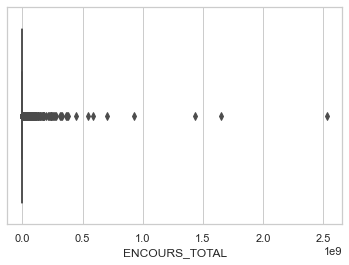

In [576]:
ax = sns.boxplot(x=df_avo_groupBy_risk['ENCOURS_TOTAL'])

### Détection des valeurs aberrantes pour df_avo_agg_risk

In [577]:
df_avo_groupBy_risk #df_avo_groupBy_amf

ENCOURS_TOTAL
ID_ENTREPRISE PRODUIT NIVEAU_RISQUE_FOND               
3             PEE     2                       39.265613
12            PEE     0                   939472.077207
                      1                   348564.057835
                      2                   132440.139555
              PER     0                   774092.511702
...                                                 ...
164715        PEE     7                   518941.358492
              PER     0                    17075.449376
                      1                    28822.597418
                      2                    27325.561508
                      6                    19809.696152

[184135 rows x 1 columns]

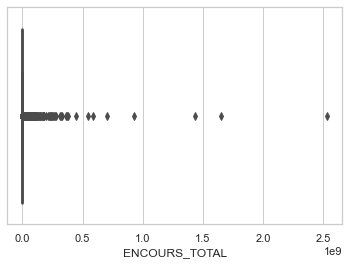

In [578]:
ax = sns.boxplot(x=df_avo_groupBy_risk['ENCOURS_TOTAL'],palette="Set1", linewidth=2.5)

#### La premiere methode 

In [579]:
## on remarque qu'ilya des valeurs aberrantes qui situées aprés la valeurs 1000 donc on peut les supprimés tous les lignes du dataframe 
## dont la colonne ENCOURS_TOTAL >= 1000

In [580]:
new_df_avo_groupBy_risk = df_avo_groupBy_risk[df_avo_groupBy_risk['ENCOURS_TOTAL'] < 25000]

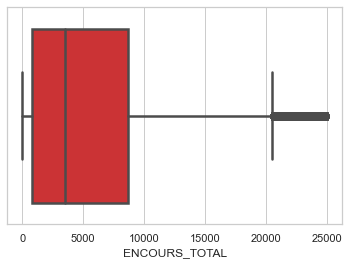

In [581]:
ax = sns.boxplot(x=new_df_avo_groupBy_risk['ENCOURS_TOTAL'],palette="Set1", linewidth=2.5)

#### La deuxieme methode 

In [582]:
## on peut supprimer les valerus aberantes directement en utilisant une formule

In [583]:
def supp_abb(df):
    Q1 = df['ENCOURS_TOTAL'].quantile(0.25)
    Q3 = df['ENCOURS_TOTAL'].quantile(0.75)
    IQR = Q3 - Q1    #IQR c'est le inter-quartile range. => la moitié des valeurs est entre le Q1(25e centille) et Q3 (75e centille) 
    filter = (df['ENCOURS_TOTAL'] >= Q1 - 1.5 * IQR) & (df['ENCOURS_TOTAL'] <= Q3 + 1.5 *IQR)
    return df.loc[filter]

In [584]:
n_df_avo_groupBy_risk = supp_abb(df_avo_groupBy_risk)

In [585]:
n_df_avo_groupBy_risk

ENCOURS_TOTAL
ID_ENTREPRISE PRODUIT NIVEAU_RISQUE_FOND               
3             PEE     2                       39.265613
13            PER     0                       98.277937
                      2                     1349.291586
14            PEE     0                     8551.740019
15            PEE     1                    35123.205158
...                                                 ...
164347        PEE     2                      539.216614
164715        PER     0                    17075.449376
                      1                    28822.597418
                      2                    27325.561508
                      6                    19809.696152

[161538 rows x 1 columns]

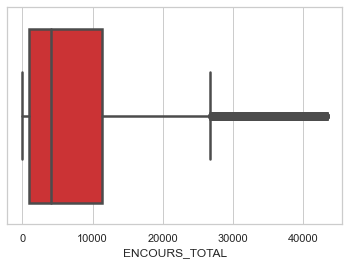

In [586]:
ax = sns.boxplot(x=n_df_avo_groupBy_risk['ENCOURS_TOTAL'],palette="Set1", linewidth=2.5)

In [587]:
## on peut remarquer que le résultat des deux methodes sont les memes

### Détection des valeurs aberrantes pour df_avo_agg_amf

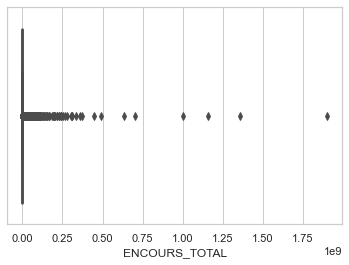

In [588]:
ax = sns.boxplot(x=df_avo_groupBy_amf['ENCOURS_TOTAL'],palette="Set1", linewidth=2.5)

In [589]:
## on applique la meme fonction sur le deuxieme dataframe => ces sont les meme valereurs du dataframe risk car on a fait le groupby
## sur deux colonnes qui existent dans les dataframes => ce travail de suppression des valeurs abérantes on doit le faire juste aprés
## le groupby en haut . 

In [590]:
n_df_avo_groupBy_amf = supp_abb(df_avo_groupBy_amf)

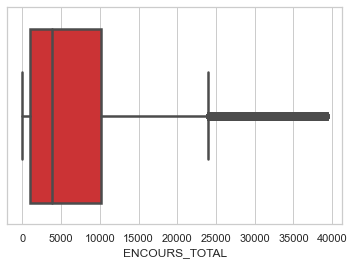

In [591]:
ax = sns.boxplot(x=n_df_avo_groupBy_amf['ENCOURS_TOTAL'],palette="Set1", linewidth=2.5)

In [592]:
ax

<AxesSubplot:xlabel='ENCOURS_TOTAL'>

In [593]:
## maintenat on soit appliquer le travail qu'on a fait l'autre fois pour obtenir le dataframe résultat

In [594]:
df_avo_risk = transpose_df(n_df_avo_groupBy_risk, ['ENCOURS_TOTAL'], ['ID_ENTREPRISE'], ['PRODUIT', 'NIVEAU_RISQUE_FOND'])
df_avo_amf = transpose_df(n_df_avo_groupBy_amf, ['ENCOURS_TOTAL'], ['ID_ENTREPRISE'], ['PRODUIT', 'CODE_AMF'])

>>>> TRANSPOSE COLUMNS
>>>> RENAME COLUMNS
>>>> REPLACING null by 0
>>>> TRANSPOSE COLUMNS
>>>> RENAME COLUMNS
>>>> REPLACING null by 0


In [595]:
df_avo_risk.columns = [col+'_risk'  if col != 'ID_ENTREPRISE' else col for col in df_avo_risk.columns.values]
df_avo_amf.columns = [col+'_amf'  if col != 'ID_ENTREPRISE' else col for col in df_avo_amf.columns.values]

In [596]:
merged_df = pd.merge(df_avo_risk, df_avo_amf, on='ID_ENTREPRISE')

In [597]:
## on refait la normailsation en utilisant MinMaxScaler
merged_df[merged_df.columns[1:]] = MinMaxScaler().fit_transform(merged_df[merged_df.columns[1:]])
merged_df ## c'est le dataframe résultat

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,...,ENCOURS_TOTAL_PEE_4_amf,ENCOURS_TOTAL_PEE_5_amf,ENCOURS_TOTAL_PEE_6_amf,ENCOURS_TOTAL_PEE_7_amf,ENCOURS_TOTAL_PER_1_amf,ENCOURS_TOTAL_PER_2_amf,ENCOURS_TOTAL_PER_3_amf,ENCOURS_TOTAL_PER_4_amf,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf
0,3,0.000000,0.000000,0.000906,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.001001,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,13,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002267,0.000000,0.031126,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.002502,0.000000,0.000000,0.034357
2,14,0.197253,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.217701,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,15,0.000000,0.810834,0.475653,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.910928,0.000000,0.52475,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,18,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.295976,0.003316,...,0.000000,0.000000,0.00000,0.0,0.326296,0.0,0.000000,0.000000,0.751317,0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68738,164338,0.000791,0.000000,0.000000,0.0,0.0,0.0,0.000791,0.000000,0.000000,...,0.000873,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000873,0.000000,0.000000
68739,164344,0.000000,0.001149,0.000000,0.0,0.0,0.0,0.001131,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.001248,0.000000
68740,164346,0.000000,0.001154,0.000000,0.0,0.0,0.0,0.001153,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.001273,0.000000
68741,164347,0.012369,0.000000,0.012438,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.013651,0.013752,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


## Clustering sur les données normalisées (Kmeans+PCA)

In [598]:
##On va utiliser PCA pour réduire le nombre de colonnes => nous améliorons les performances de notre algorithme de clustering(kmeans). 
##En plus de cela, en diminuant le nombre de colonnes, le bruit est également réduit(outilers) 

In [599]:
## pour décider combien des colonnes on va garder, on doit voir le graph de variance cummulative

In [600]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [601]:
## on va pas considérer la colonne id_entreprise
x = merged_df.iloc[:,1:]

In [602]:
x

,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,ENCOURS_TOTAL_PER_6_risk,...,ENCOURS_TOTAL_PEE_4_amf,ENCOURS_TOTAL_PEE_5_amf,ENCOURS_TOTAL_PEE_6_amf,ENCOURS_TOTAL_PEE_7_amf,ENCOURS_TOTAL_PER_1_amf,ENCOURS_TOTAL_PER_2_amf,ENCOURS_TOTAL_PER_3_amf,ENCOURS_TOTAL_PER_4_amf,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf
0,0.000000,0.000000,0.000906,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.001001,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002267,0.000000,0.031126,0.00000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.002502,0.000000,0.000000,0.034357
2,0.197253,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.217701,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.810834,0.475653,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.910928,0.000000,0.52475,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.295976,0.003316,0.00000,...,0.000000,0.000000,0.00000,0.0,0.326296,0.0,0.000000,0.000000,0.751317,0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68738,0.000791,0.000000,0.000000,0.0,0.0,0.0,0.000791,0.000000,0.000000,0.00000,...,0.000873,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000873,0.000000,0.000000
68739,0.000000,0.001149,0.000000,0.0,0.0,0.0,0.001131,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.001248,0.000000
68740,0.000000,0.001154,0.000000,0.0,0.0,0.0,0.001153,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.001273,0.000000
68741,0.012369,0.000000,0.012438,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.013651,0.013752,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [603]:
pca = PCA()
pca.fit_transform(x)

array([[-2.39558130e-01, -5.91900516e-02, -2.08506439e-02, ...,
        -1.21379388e-04, -3.57034772e-05,  4.59209356e-05],
       [-2.34941145e-01, -5.17996661e-02, -1.12649909e-02, ...,
        -1.58487352e-04, -3.62791970e-05,  5.46406064e-05],
       [-1.39223318e-01,  1.20853453e-01, -8.75738631e-02, ...,
        -7.19820445e-05, -4.23710978e-05,  1.93791523e-04],
       ...,
       [-2.38125874e-01, -5.99689440e-02, -2.06619646e-02, ...,
        -1.23413290e-04, -3.66109496e-05,  4.42184002e-05],
       [-2.30568519e-01, -4.36296572e-02, -2.66911703e-02, ...,
        -1.01339921e-04, -3.86053589e-05,  9.17741549e-05],
       [ 2.92723814e-01,  1.75651644e-01,  1.25059927e+00, ...,
        -2.15406524e-03,  6.07139553e-05,  8.12046845e-04]])

In [604]:
range(pca.n_components_)

range(0, 24)

([<matplotlib.axis.XTick at 0x16d539e70c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

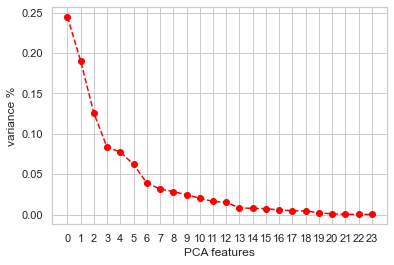

In [605]:
# Plot the explained variances
# features c'est le range de nombre de classes résultats 
features = range(pca.n_components_)
plt.plot(features, pca.explained_variance_ratio_, color='red', marker ='o', linestyle = '--')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [606]:
## il faut avoir une grande quantité des données pour juger combien on va utiliser des colonnes
## generalement on prend 80% du variance donc on va utiliser 4 components ici

In [607]:
## on va tester avec  6 

In [608]:
###############*************ON VA GÉNERER LE FICHIER QU'ON VA UTILISER DANS LE POWER BI******************

In [609]:
import numpy as np

In [610]:
pca = PCA(n_components=6)
scores_pca = pca.fit_transform(x)## ici on prend les scores pour combiner kmeans avec pca pour la ségmentation des données

In [611]:
pca.components_

array([[ 2.79638803e-01,  5.61722566e-01,  1.54372445e-01,
         1.63055507e-04,  5.80751364e-02,  1.49678550e-04,
         1.55272918e-01,  2.03912412e-01,  6.86951754e-02,
         2.00180053e-02, -1.04963295e-04,  5.81950649e-01,
         5.80019189e-03,  1.86367219e-01,  2.08479026e-01,
         7.09450248e-02,  1.24189839e-01, -1.09884905e-04,
         2.04120399e-01,  3.79462363e-04,  1.11204603e-01,
         9.89414463e-02,  5.90710729e-02,  5.99437283e-02],
       [ 4.98785873e-01, -3.32036958e-01,  2.42023658e-01,
        -3.27786604e-04,  9.08511121e-02,  5.09581765e-04,
         2.47452481e-01, -1.07571437e-01,  1.13346025e-01,
         3.40291281e-02, -2.16740752e-05, -3.57462812e-01,
         1.12961873e-02,  2.90089722e-01,  3.76618762e-01,
         1.14402470e-01,  1.90932386e-01,  1.59726616e-04,
        -1.10683081e-01,  1.44512779e-03,  1.60576359e-01,
         1.72720876e-01,  8.45738463e-02,  9.41156415e-02],
       [-1.74847200e-01, -1.87606144e-01, -9.02384741e

In [612]:
scores_pca.shape

(68743, 6)

In [613]:
# nombre des components
n_scores_pca= pca.components_.shape[0]

In [614]:
## on va prendre la colonne la plus importante pour chaque component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_scores_pca)]

In [615]:
most_important

[11, 0, 18, 6, 2, 13]

In [616]:
initial_feature_names = list(x.columns)

In [617]:
## prendre les noms des colonnes qu'on va utiliser
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_scores_pca)]

In [618]:
most_important_names

['ENCOURS_TOTAL_PEE_1_amf',
 'ENCOURS_TOTAL_PEE_0_risk',
 'ENCOURS_TOTAL_PER_1_amf',
 'ENCOURS_TOTAL_PER_0_risk',
 'ENCOURS_TOTAL_PEE_2_risk',
 'ENCOURS_TOTAL_PEE_3_amf']

In [619]:
## on va prendre que les colonnes les plus importantes
prepared_df = x[most_important_names]

In [620]:
prepared_df

,ENCOURS_TOTAL_PEE_1_amf,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PER_1_amf,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_3_amf
0,0.000000,0.000000,0.000000,0.000000,0.000906,0.000000
1,0.000000,0.000000,0.000000,0.002267,0.000000,0.000000
2,0.000000,0.197253,0.000000,0.000000,0.000000,0.000000
3,0.893844,0.000000,0.000000,0.000000,0.475653,0.406048
4,0.000000,0.000000,0.326296,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
68738,0.000000,0.000791,0.000000,0.000791,0.000000,0.000000
68739,0.001266,0.000000,0.000000,0.001131,0.000000,0.000000
68740,0.001272,0.000000,0.000000,0.001153,0.000000,0.000000
68741,0.000000,0.012369,0.000000,0.000000,0.012438,0.000000


In [621]:
## ici on va enregistrer le dataframe dans un fichier excel pour l'uiliser avec power bi
prepared_df.to_excel('prepared_df.xlsx')

In [622]:
## pour determiner combien de clusters on doit utiliser on va faire un visualisation en changeant a chaque fois le nombre de clusters = hypertuning

In [623]:
wcss = []
for i in range(1,7):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [624]:
wcss

[18854.83954057526,
 14528.662188245127,
 11553.443612357025,
 9884.401682787307,
 8616.595474580266,
 7796.420425837692]

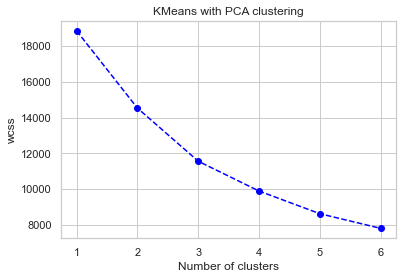

In [625]:
features = range(pca.n_components_)
plt.plot(range(1,7), wcss, color='blue', marker ='o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title("KMeans with PCA clustering")
plt.show()

In [626]:
## on va choisir ici le nombre de cluters appartir de point elbow qui est le point dans la courbe ou il ya une forte inclinison 
## on va choisr 3 ici 

In [627]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [628]:
## analyse des résultats

In [629]:
df_pca_kmeans = pd.concat([merged_df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
## axis 1 c'est l'axe des colonnes et 0 c'est l'axe des lignes

In [630]:
df_pca_kmeans

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,...,ENCOURS_TOTAL_PER_3_amf,ENCOURS_TOTAL_PER_4_amf,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf,0,1,2,3,4,5
0,3,0.000000,0.000000,0.000906,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.239558,-0.059190,-0.020851,0.002891,0.000638,-0.010977
1,13,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002267,0.000000,0.031126,...,0.002502,0.000000,0.000000,0.034357,-0.234941,-0.051800,-0.011265,0.012295,0.013565,-0.014259
2,14,0.197253,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.139223,0.120853,-0.087574,-0.101297,-0.094665,-0.138426
3,15,0.000000,0.810834,0.475653,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.140047,0.027907,-0.597209,-0.081510,0.350923,-0.108936
4,18,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.295976,0.003316,...,0.000000,0.000000,0.751317,0.003660,-0.067984,-0.063216,0.401356,-0.120733,0.072337,-0.023568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68738,164338,0.000791,0.000000,0.000000,0.0,0.0,0.0,0.000791,0.000000,0.000000,...,0.000000,0.000873,0.000000,0.000000,-0.239156,-0.058454,-0.020547,0.003246,-0.000620,-0.011857
68739,164344,0.000000,0.001149,0.000000,0.0,0.0,0.0,0.001131,0.000000,0.000000,...,0.000000,0.000000,0.001248,0.000000,-0.238138,-0.059972,-0.020670,0.004099,-0.000201,-0.011305
68740,164346,0.000000,0.001154,0.000000,0.0,0.0,0.0,0.001153,0.000000,0.000000,...,0.000000,0.000000,0.001273,0.000000,-0.238126,-0.059969,-0.020662,0.004117,-0.000202,-0.011308
68741,164347,0.012369,0.000000,0.012438,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.230569,-0.043630,-0.026691,-0.004719,0.004229,-0.017465


In [632]:
df_pca_kmeans.columns.values[-5:] = ['component 5','component 4','component 3','component 2','component 1'][::-1]

In [633]:
df_pca_kmeans.columns

Index(['ID_ENTREPRISE', 'ENCOURS_TOTAL_PEE_0_risk', 'ENCOURS_TOTAL_PEE_1_risk',
       'ENCOURS_TOTAL_PEE_2_risk', 'ENCOURS_TOTAL_PEE_5_risk',
       'ENCOURS_TOTAL_PEE_6_risk', 'ENCOURS_TOTAL_PEE_7_risk',
       'ENCOURS_TOTAL_PER_0_risk', 'ENCOURS_TOTAL_PER_1_risk',
       'ENCOURS_TOTAL_PER_2_risk', 'ENCOURS_TOTAL_PER_6_risk',
       'ENCOURS_TOTAL_PEE_0_amf', 'ENCOURS_TOTAL_PEE_1_amf',
       'ENCOURS_TOTAL_PEE_2_amf', 'ENCOURS_TOTAL_PEE_3_amf',
       'ENCOURS_TOTAL_PEE_4_amf', 'ENCOURS_TOTAL_PEE_5_amf',
       'ENCOURS_TOTAL_PEE_6_amf', 'ENCOURS_TOTAL_PEE_7_amf',
       'ENCOURS_TOTAL_PER_1_amf', 'ENCOURS_TOTAL_PER_2_amf',
       'ENCOURS_TOTAL_PER_3_amf', 'ENCOURS_TOTAL_PER_4_amf',
       'ENCOURS_TOTAL_PER_5_amf', 'ENCOURS_TOTAL_PER_6_amf', 'component 1',
       'component 2', 'component 3', 'component 4', 'component 5',
       'component_6'],
      dtype='object')

In [634]:
df_pca_kmeans['segment kmeans pca'] = kmeans_pca.labels_

In [635]:
df_pca_kmeans['segment'] = df_pca_kmeans['segment kmeans pca'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'})

In [636]:
df_pca_kmeans

,ID_ENTREPRISE,ENCOURS_TOTAL_PEE_0_risk,ENCOURS_TOTAL_PEE_1_risk,ENCOURS_TOTAL_PEE_2_risk,ENCOURS_TOTAL_PEE_5_risk,ENCOURS_TOTAL_PEE_6_risk,ENCOURS_TOTAL_PEE_7_risk,ENCOURS_TOTAL_PER_0_risk,ENCOURS_TOTAL_PER_1_risk,ENCOURS_TOTAL_PER_2_risk,...,ENCOURS_TOTAL_PER_5_amf,ENCOURS_TOTAL_PER_6_amf,component 1,component 2,component 3,component 4,component 5,component_6,segment kmeans pca,segment
0,3,0.000000,0.000000,0.000906,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.239558,-0.059190,-0.020851,0.002891,0.000638,-0.010977,0,first
1,13,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002267,0.000000,0.031126,...,0.000000,0.034357,-0.234941,-0.051800,-0.011265,0.012295,0.013565,-0.014259,0,first
2,14,0.197253,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.139223,0.120853,-0.087574,-0.101297,-0.094665,-0.138426,0,first
3,15,0.000000,0.810834,0.475653,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.140047,0.027907,-0.597209,-0.081510,0.350923,-0.108936,1,second
4,18,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.295976,0.003316,...,0.751317,0.003660,-0.067984,-0.063216,0.401356,-0.120733,0.072337,-0.023568,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68738,164338,0.000791,0.000000,0.000000,0.0,0.0,0.0,0.000791,0.000000,0.000000,...,0.000000,0.000000,-0.239156,-0.058454,-0.020547,0.003246,-0.000620,-0.011857,0,first
68739,164344,0.000000,0.001149,0.000000,0.0,0.0,0.0,0.001131,0.000000,0.000000,...,0.001248,0.000000,-0.238138,-0.059972,-0.020670,0.004099,-0.000201,-0.011305,0,first
68740,164346,0.000000,0.001154,0.000000,0.0,0.0,0.0,0.001153,0.000000,0.000000,...,0.001273,0.000000,-0.238126,-0.059969,-0.020662,0.004117,-0.000202,-0.011308,0,first
68741,164347,0.012369,0.000000,0.012438,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.230569,-0.043630,-0.026691,-0.004719,0.004229,-0.017465,0,first


In [637]:
## visualizationn des clusters sur un graph 2d

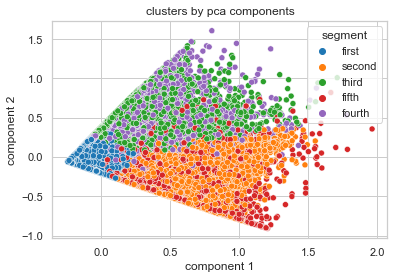

In [638]:
x_axis = df_pca_kmeans['component 1']
y_axis = df_pca_kmeans['component 2']
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['segment'], palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['segment'], palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.title('clusters by pca components')
plt.show()

In [ ]:
df_pca_kmeans.to_excel('dataFrame_Kmeans_entreprise_v1.xlsx')